In [113]:
#imort pandas
import pandas as pd

In [114]:
#read dataset
dataset = pd.read_csv('SampData_DecisionTree.csv')

In [115]:
dataset.head(2)

,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,Income
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,22,State-gov,Some-college,Married-civ-spouse,Other-service,Husband,Black,Male,15,United-States,<=50K


In [116]:
print(dataset.shape)

(467, 11)


In [117]:
feature_col_names = dataset.columns[:-1]

In [118]:
#features comlumn names
print(feature_col_names)

Index(['age', 'workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'hours-per-week', 'native-country'],
      dtype='object')


In [119]:
# To convert text data to numeric data for random forest classifier
from sklearn.preprocessing import LabelEncoder
le = preprocessing.LabelEncoder()

In [120]:
# apply this transforamtion to whole dataframe
dataset = dataset.apply(LabelEncoder().fit_transform)

In [121]:
dataset.head(5)

,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,Income
0,22,5,9,4,0,1,4,1,22,23,0
1,5,5,15,2,7,0,2,1,6,23,0
2,24,5,8,2,2,0,4,1,22,23,0
3,12,5,9,2,8,0,4,1,30,23,1
4,29,5,12,6,9,4,4,1,22,23,0


In [122]:
# prepare dataset for features X and y
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,(dataset.shape[1]-1)].values

In [123]:
print(y.shape)

(467,)


In [124]:
print (X.shape)

(467, 10)


In [125]:
# import train_test_split
from sklearn.model_selection import train_test_split

In [126]:
# To check all the data columns in numric form
dataset.describe()

,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,Income
count,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000
mean,20.743041,2.164882,10.453961,2.546039,5.869379,1.449679,3.642398,0.670236,22.413276,22.049251,0.224839
std,12.683601,0.965393,3.651021,1.461788,3.648456,1.629639,0.845692,0.470632,7.261699,3.462821,0.417924
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.000000,2.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,22.000000,23.000000,0.000000
50%,20.000000,2.000000,11.000000,2.000000,7.000000,1.000000,4.000000,1.000000,22.000000,23.000000,0.000000
75%,29.000000,2.000000,12.000000,4.000000,8.500000,3.000000,4.000000,1.000000,24.000000,23.000000,0.000000
max,57.000000,5.000000,15.000000,6.000000,12.000000,5.000000,4.000000,1.000000,43.000000,23.000000,1.000000


In [127]:
# Split dataset into train and test dataset
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.30, random_state=23)

In [128]:
print('Training Features Shape:', train_X.shape)
print('Training Labels Shape:', train_y.shape)
print('Testing Features Shape:', test_X.shape)
print('Testing Labels Shape:', test_y.shape)

Training Features Shape: (326, 10)
Training Labels Shape: (326,)
Testing Features Shape: (141, 10)
Testing Labels Shape: (141,)


In [129]:
# Load scikit's random forest classifier library
from sklearn.ensemble import RandomForestClassifier

In [130]:
# Create a random forest Classifier
clf = RandomForestClassifier(n_jobs=2, random_state=23)

# Train the Classifier to take the training features train_X and learn how they relate to the training train_y 
clf.fit(train_X, train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
            oob_score=False, random_state=23, verbose=0, warm_start=False)

In [131]:
clf.feature_importances_

array([ 0.25902541,  0.10789106,  0.13781196,  0.09759991,  0.1098424 ,
        0.11483244,  0.01966638,  0.01516982,  0.11752917,  0.02063145])

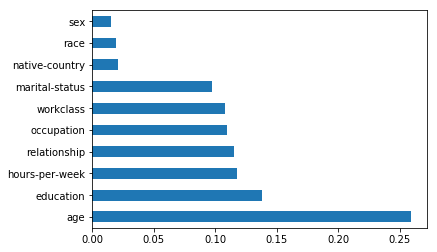

In [132]:
# Enable plot in jupyter notebook
%matplotlib inline  

#features importance plot
feat_importances = pd.Series(clf.feature_importances_, index=feature_col_names)
feat_importances.nlargest(10).plot(kind='barh')

In [133]:
# prediction across the test_X data points
y_pred = clf.predict(test_X)

In [134]:
# import cocnfusion_matrix 
from sklearn.metrics import confusion_matrix

In [135]:
# Create confusion matrix
# 0 = "<=50k" , 1 = ">50k"
pd.crosstab(test_y, y_pred, rownames=['Actual income'], colnames=['Predicted income'])

Predicted income,0,1
Actual income,,
0,98,11
1,18,14


In [136]:
conf_mat = confusion_matrix(test_y, y_pred)
print(conf_mat)

[[98 11]
 [18 14]]


In [137]:
# True positive and Flase Negative
(conf_mat[0][0]+conf_mat[1,1] ) / conf_mat.sum()

0.79432624113475181